## Data Manipulation

In this notebook the data from the HIV dataset found in the repository https://github.com/GLambard/Molecules_Dataset_Collection is prepared to generate SMILES Embeddings to be feeded to Deep Learning models.

Obtain the latest version of the HIV dataset from the repository.

In [1]:
import numpy as np
import pandas as pd
import requests
import io

url = 'https://github.com/GLambard/Molecules_Dataset_Collection/raw/master/originals/HIV.csv'

data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')), index_col=0)
df.reset_index(inplace=True)
df

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


Process all the SMILES in the dataset, splitting them by tokens and calculating their respective lengths which corresponds to the number of tokens they contain.

In [6]:
from smilesProcessor import SmilesProcessor

sp = SmilesProcessor()
processed_smiles, smiles_lengths = sp.process_smiles_array(df['smiles'].values)
df['processed_smiles'] = processed_smiles
df['smiles_length'] = smiles_lengths
df

,smiles,activity,HIV_active,processed_smiles,smiles_length
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0,C C C 1 = [ O + ] [ Cu - 3 ] 2 ( [ O + ] = C (...,51
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0,C ( = C c 1 c c c c c 1 ) C 1 = [ O + ] [ Cu -...,83
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0,C C ( = O ) N 1 c 2 c c c c c 2 Sc 2 c 1 c c c...,31
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0,N c 1 c c c ( C = C c 2 c c c ( N ) c c 2 S ( ...,47
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0,O = S ( = O ) ( O ) C C S ( = O ) ( = O ) O,22
...,...,...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0,C C C 1 C C C 2 c 3 c ( [ n H ] c 4 c c c ( C ...,55
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0,C c 1 c c c 2 [ n H ] c 3 c ( c 2 c 1 ) C 1 C ...,71
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0,C c 1 c c c ( N 2 C ( = O ) C 3 c 4 [ n H ] c ...,60
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0,C c 1 c c c c ( N 2 C ( = O ) C 3 c 4 [ n H ] ...,60


Analyse the length of the SMILES in the dataset by plotting a histogram with the distribution of the lengths.

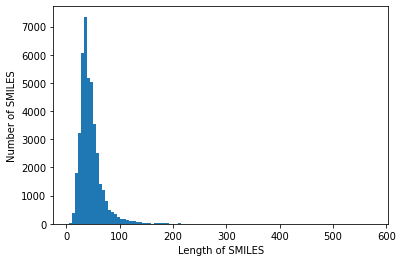

In [7]:
import matplotlib.pyplot as plt

plt.hist(smiles_lengths, bins=100)
plt.ylabel('Number of SMILES')
plt.xlabel('Length of SMILES')
plt.show()

Since there are a few outliers that can cause problems when feeding them to models, define a range with minimum and maximum lengths for the SMILES and check to which percentage of the data it corresponds.

In [8]:
length_range = (15, 125)

filtered = filter(lambda x: length_range[0] <= x <= length_range[1], smiles_lengths)
percentage = len(list(filtered)) / len(processed_smiles)
print('Percentage of instances with SMILES\' length between %s and %s: %s' % (length_range[0], length_range[1], percentage))

sequence_length = length_range[1]

Percentage of instances with SMILES' length between 15 and 125: 0.9813018211880273


Remove the instances that are not in the range defined (outliers).

In [9]:
df = df[(df['smiles_length'] >= length_range[0]) & (df['smiles_length'] <= length_range[1])]
df = df.drop('smiles_length', axis='columns')
df

,smiles,activity,HIV_active,processed_smiles
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0,C C C 1 = [ O + ] [ Cu - 3 ] 2 ( [ O + ] = C (...
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0,C ( = C c 1 c c c c c 1 ) C 1 = [ O + ] [ Cu -...
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0,C C ( = O ) N 1 c 2 c c c c c 2 Sc 2 c 1 c c c...
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0,N c 1 c c c ( C = C c 2 c c c ( N ) c c 2 S ( ...
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0,O = S ( = O ) ( O ) C C S ( = O ) ( = O ) O
...,...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0,C C C 1 C C C 2 c 3 c ( [ n H ] c 4 c c c ( C ...
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0,C c 1 c c c 2 [ n H ] c 3 c ( c 2 c 1 ) C 1 C ...
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0,C c 1 c c c ( N 2 C ( = O ) C 3 c 4 [ n H ] c ...
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0,C c 1 c c c c ( N 2 C ( = O ) C 3 c 4 [ n H ] ...


Save the processed data into a csv file.

In [10]:
df.to_csv("HIV_processed.csv")